In [1]:
#importing the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
import random
import matplotlib.cm as cm 
import seaborn as sns

In [3]:
#reading in the data.
data = pd.read_csv("dataexercise2.csv")

In [4]:
#creating the design matrix.
x=data.drop(columns=["y"])

In [5]:
#creating the target column vector and the log of the factorial of the target vector.
y = data["y"]
logyf= [np.log(math.factorial(i)) for i in y]

In [6]:
# The MH algorithm.
acc_count=0 # acceptance count variable to calculate acceptance percentage.
theta_samples = [] # list to store all the samples generated for theta.
theta = np.random.randn(4,1) # initial value.
sigma_prop = 0.067 # standard deviation of gaussian proposal. Tuned to 0.067
n_samps = 2400 # number of samples to take.
sig_sq = 25 # prior variance.
for s in range(n_samps):
    # generate theta_new using a random walk proposal. 
    theta_new = theta + np.random.randn(4,1)*sigma_prop
    # computing the log of the ratio of the posteriors for theta and theta new.
    r =  -(1.0/(2.0*sig_sq))*np.dot(theta_new.T,theta_new).flatten()
    r -= -(1.0/(2.0*sig_sq))*np.dot(theta.T,theta).flatten()
    P_new = np.exp(np.dot(x,theta_new))
    P = np.exp(np.dot(x,theta))
    r += np.sum(np.multiply(y,np.dot(x,theta_new).flatten()) - P_new.flatten() - logyf)
    r -= np.sum(np.multiply(y,np.dot(x,theta).flatten()) - P.flatten() - logyf )
    #Since ratio is in log form, i remove the log to test for acceptance.
    if np.exp(r)>=1:
        # accept if ratio is greater than or equal to 1.
        theta = theta_new
        acc_count+=1
    else:
        if random.uniform(0,1) <= np.exp(r):
            # if ratio is less than 1, accept if the ratio is higher than random number generated uniformly between 0 and 1.
            theta = theta_new
            acc_count+=1
        else:
            # otherwise reject
            pass
    theta_samples.append(theta.flatten()) #appending the newly generated sample to the list.
print("Acceptance Rate: " + str((acc_count/n_samps)*100)) # printing acceptance rate.

Acceptance Rate: 36.20833333333333


In [47]:
# removing the first 100 samples which are from the burnin period.
theta_samples_cleaned=theta_samples[100:]

In [48]:
# computing the posterior monte carlo estimate as the average of the cleaned samples.
posterior_MC=sum(theta_samples_cleaned)/len(theta_samples_cleaned)
print("Monte-Carlo estimate of the posterior mean of theta: "+str(posterior_MC))

Monte-Carlo estimate of the posterior mean of theta: [ 1.07563637  0.43882114  0.01468655 -0.0550479 ]


In [9]:
#creating the x,y points for the scatter plot.
theta1= [i[0] for i in theta_samples]
theta2= [i[1] for i in theta_samples]

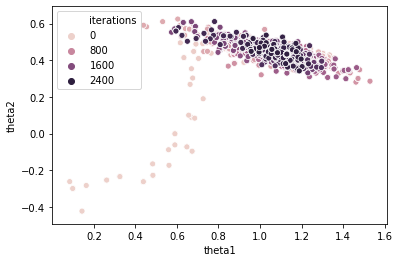

In [11]:
#plotting the data points.
df = pd.DataFrame({"theta1": theta1, "theta2": theta2, "iterations": [i for i in range(n_samps)]})
sns.scatterplot(x="theta1", y="theta2", hue="iterations", data=df)